<h2> Bussiness Understanding </h2> 
Untuk memenuhi kebutuhan primer seperti pemenuhan kebutuhan tempat tinggal. Penulis menargetkan untuk memprediksi berapa rata-rata pendapatan warga dalam satu perumahan (dalam bentuk US Dollar). Pendapatan ini dibutuhkan untuk mengestimasikan berapa pendapatan yang harus dimiliki oleh seseorang yang ingin membeli rumah di satu perumahan yang sama. Hal - hal yang diperhatikan dalam prediksi ini adalah sebagai berikut : 
<li>Dataset yang digunakan adalah dataset rumah - rumah di distrik California.</li>
<li>Data yang diambil adalah data dari sensus pada tahun 1990.</li>
<li>Data yang diambil masih bersifat preproses sehingga dibutuhkan manipulasi data lanjutan.</li>
<li>Dalam prediksi ini, dibutuhkan variabel - variabel lain seperti nilai pendapatan, harga rumah, lokasi rumah, dan banyaknya kamar.</li>

<h2>Data Understanding</h2>
Didapatkan data dengan mencakup variabel sebagai berikut: 
<li>longitude: A measure of how far west a house is; a higher value is farther west</li>
<li>latitude: A measure of how far north a house is; a higher value is farther north</li>
<li>housingMedianAge: Median age of a house within a block; a lower number is a newer building</li>
<li>totalRooms: Total number of rooms within a block</li>
<li>totalBedrooms: Total number of bedrooms within a block</li>
<li>population: Total number of people residing within a block</li>
<li>households: Total number of households, a group of people residing within a home unit, for a block</li>
<li>medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)</li>
<li>medianHouseValue: Median house value for households within a block (measured in US Dollars)</li>
<li>oceanProximity: Location of the house w.r.t ocean/sea</li>

<p>Untuk dapat memprediksikan hasilnya, penulis menggunakan algoritma linear regression, sehingga library yang dibutuhkan berupa model, library untuk visualisasi dan prediksi akurasi seperti dibawah ini yang dilanjutkan untuk mengidentifikasi isi datasetnya

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

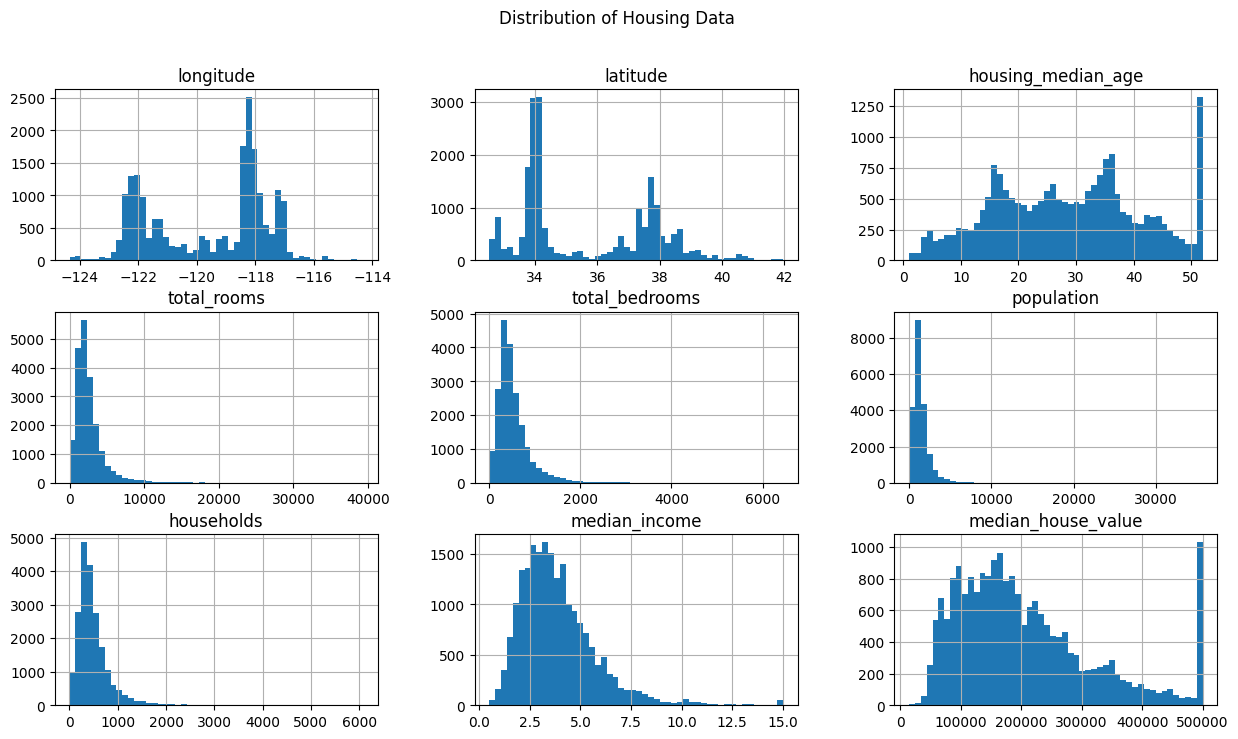

In [6]:
df.hist(bins=50, figsize=(15,8))
plt.suptitle('Distribution of Housing Data')
plt.show()

In [7]:
df_outlier = df.select_dtypes(exclude=['object'])

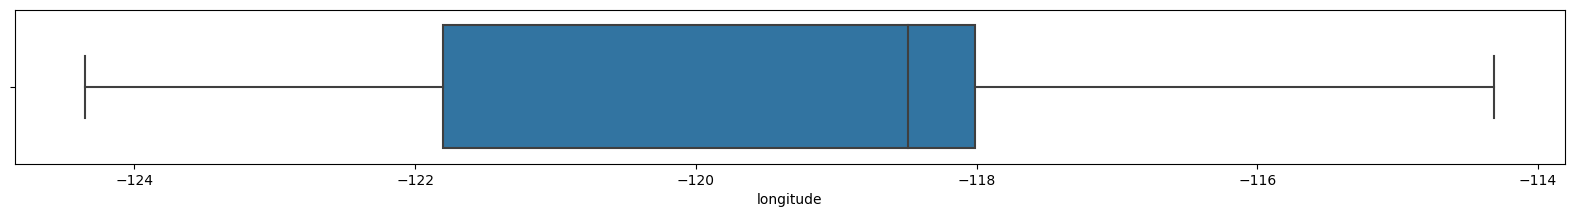

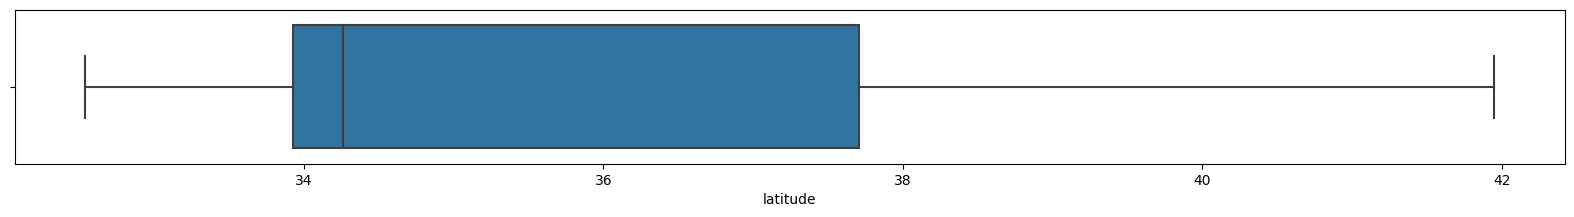

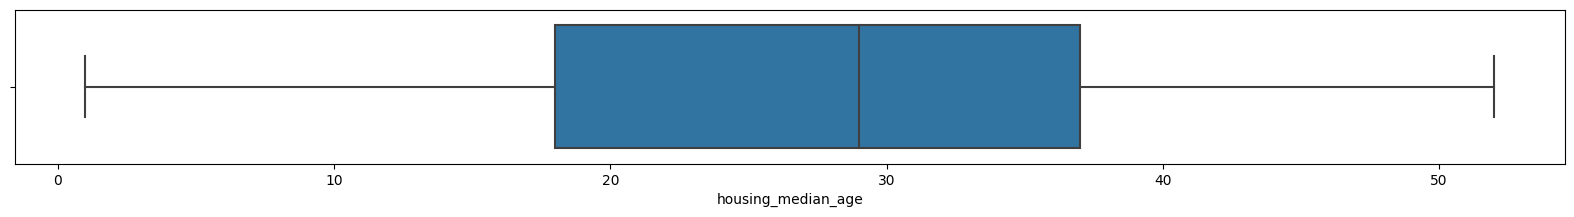

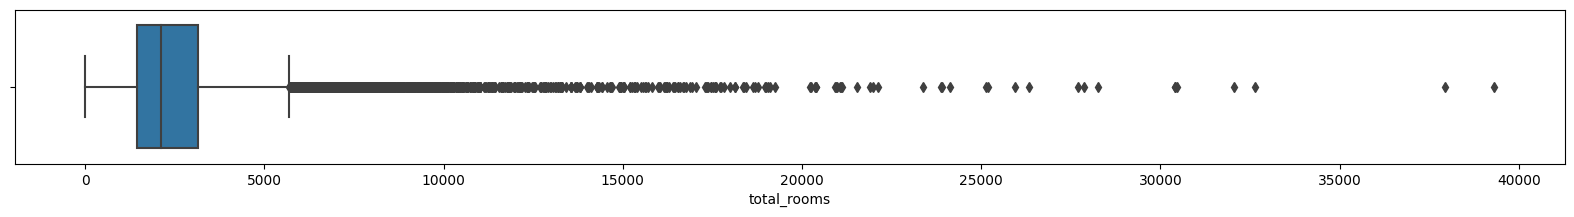

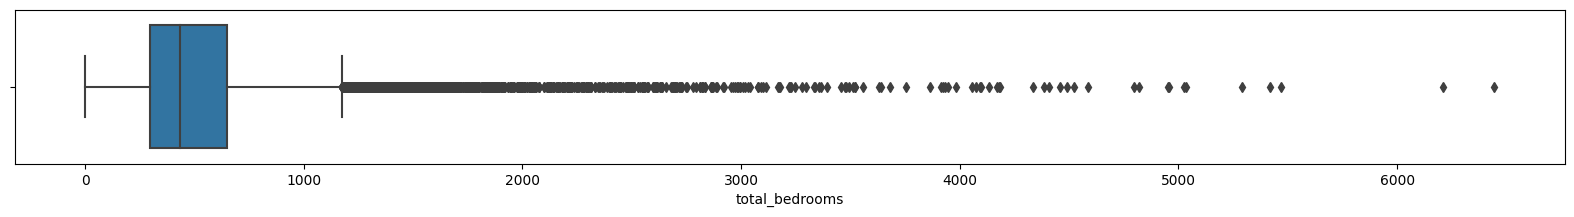

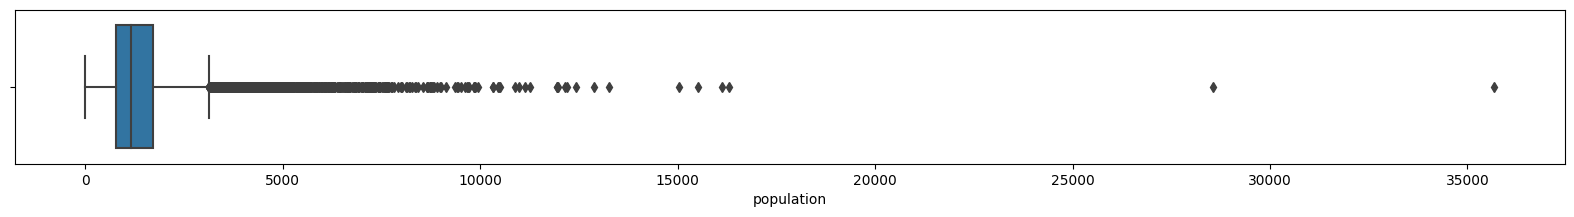

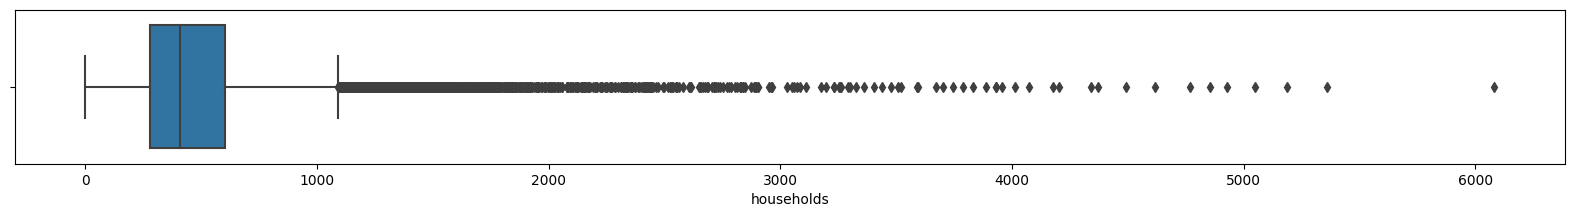

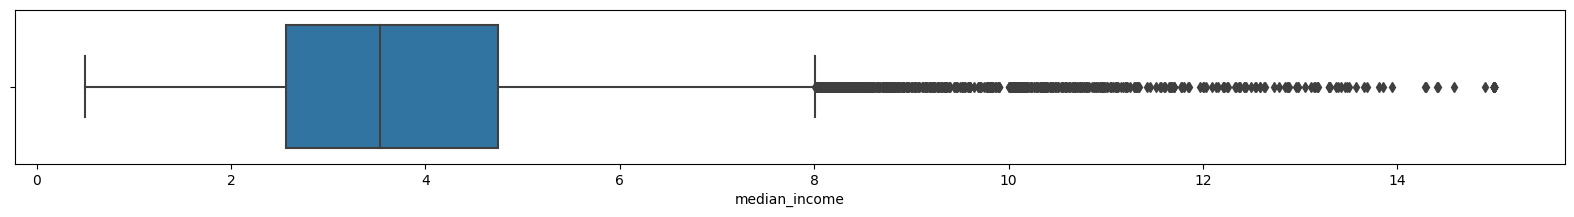

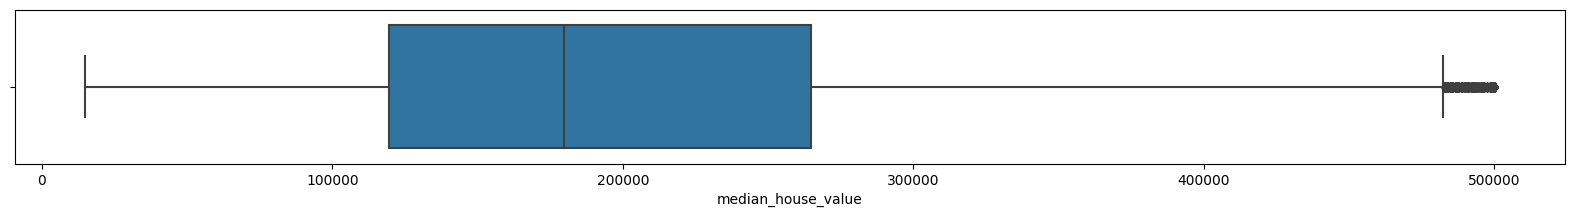

In [8]:
for i in df_outlier:
    plt.figure(figsize=(20,2))
    sns.boxplot(data=df_outlier, x=i)

In [9]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

longitude                  3.79000
latitude                   3.78000
housing_median_age        19.00000
total_rooms             1700.25000
total_bedrooms           351.00000
population               938.00000
households               325.00000
median_income              2.17985
median_house_value    145125.00000
dtype: float64

In [10]:
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

longitude              -127.485000
latitude                 28.260000
housing_median_age      -10.500000
total_rooms           -1102.625000
total_bedrooms         -230.500000
population             -620.000000
households             -207.500000
median_income            -0.706375
median_house_value   -98087.500000
dtype: float64

In [11]:
batas_atas = q3 + (1.5 * iqr)
batas_atas

longitude               -112.325000
latitude                  43.380000
housing_median_age        65.500000
total_rooms             5698.375000
total_bedrooms          1173.500000
population              3132.000000
households              1092.500000
median_income              8.013025
median_house_value    482412.500000
dtype: float64

In [12]:
df_ex_object = df.select_dtypes(exclude=['object'])
df_ex_object

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [13]:
outlier_filter = ((df_ex_object < q1 - 1.5 * iqr) | (df_ex_object > q3 + 1.5 * iqr))
outlier_filter

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,False,False,False,False,False,False,False,True,False
1,False,False,False,True,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

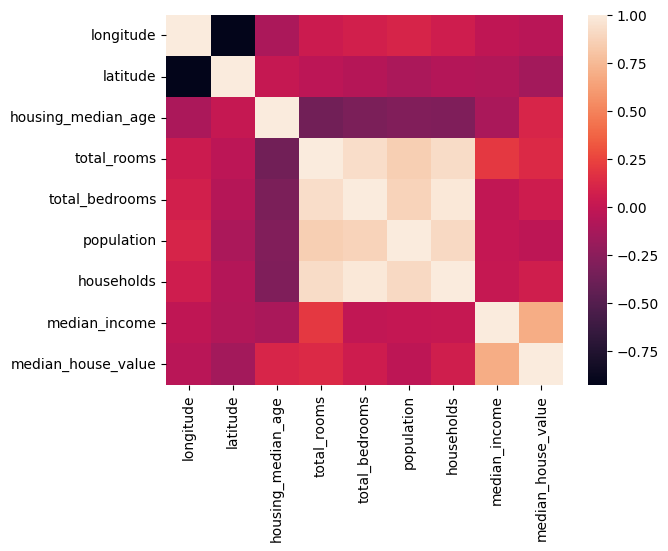

In [14]:
#sns.heatmap(df.corr(),annot=True)
sns.heatmap(df.select_dtypes(exclude="object").corr())

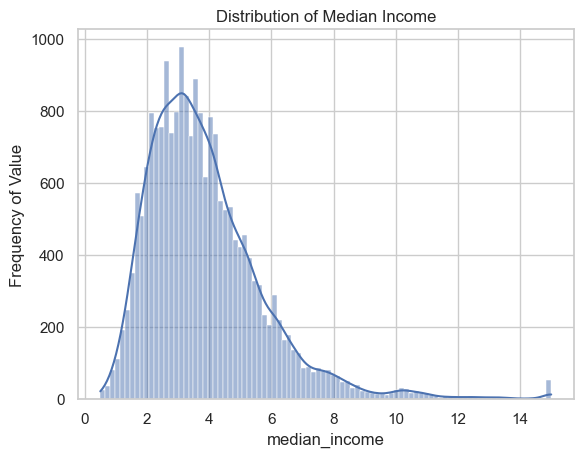

In [15]:
sns.set(style = 'whitegrid')
ax = sns.histplot(df['median_income'], kde=True)
plt.title('Distribution of Median Income')
plt.ylabel('Frequency of Value')

plt.ticklabel_format(style = 'plain')

plt.show()

<h2>Data Preprocessing</h2>

Setelah dilakukan data undertanding, diketahui bahwa data yang diambil memiliki nilai null pada variabel total bedrooms dan memiliki tipe data object pada ocean_proximity. Sehingga penulis mengisi kekosongan data pada total_bedrooms dengan cara menggunakan fillna menggunakan nilain mean (nilai tengah). Dan menghapus kolom ocean_proximity untuk penggunaan model kedepannya.

In [16]:
df ['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
df.drop(['ocean_proximity'],axis=1,inplace=True)

<AxesSubplot:>

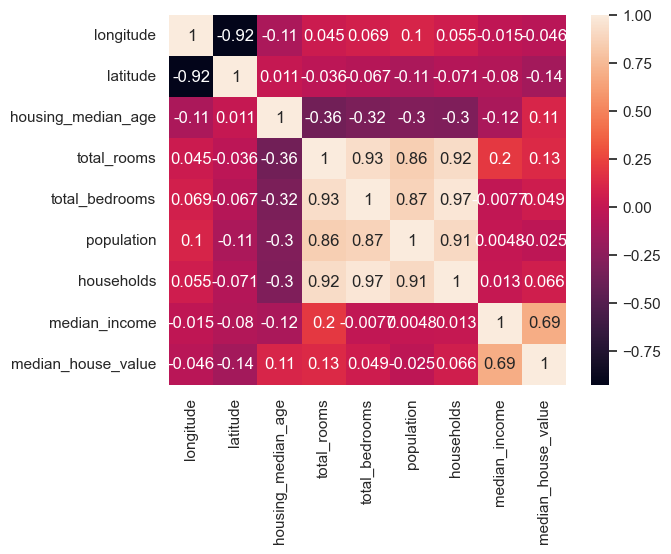

In [18]:
sns.heatmap(df.corr(),annot=True)

<h2>Data Modelling</h2>

In [19]:
X = df.drop('median_income',axis=1)
y = df['median_income']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,136900.0
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,241300.0
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,200700.0
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,72500.0
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,460000.0
...,...,...,...,...,...,...,...,...
19681,-121.62,39.15,36.0,2321.0,455.0,1168.0,489.0,74000.0
12156,-117.17,33.66,2.0,7401.0,1187.0,2826.0,839.0,177300.0
10211,-117.91,33.89,30.0,1631.0,212.0,523.0,216.0,351900.0
2445,-119.64,36.56,34.0,576.0,117.0,363.0,97.0,92500.0


In [23]:
y_pred=model.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [3.53741308 4.80748421 4.17013726 ... 5.97231219 2.71569588 4.88113905]


<h2>Data Evaluating</h2>

In [24]:
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
lr_diff.head()

,Actual value,Predicted value
14740,4.1518,3.537413
10101,5.7796,4.807484
20566,4.3487,4.170137
2670,2.4511,2.326901
15709,5.0049,6.237176


In [25]:
model.score(X_test, y_test)

0.636401024044065

In [26]:
mean_absolute_error(y_test,y_pred)

0.7703799195301297

In [27]:
mean_absolute_percentage_error(y_test,y_pred)

0.2397493436528858

In [28]:
mean_squared_error(y_test,y_pred)

1.3401641095853094

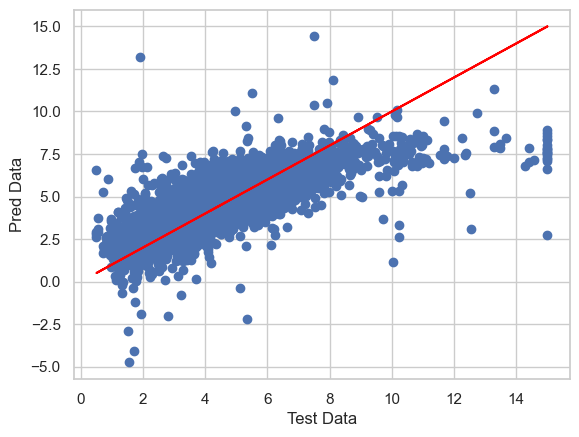

In [29]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Test Data')
plt.ylabel('Pred Data')
plt.title('')
plt.show()